it works


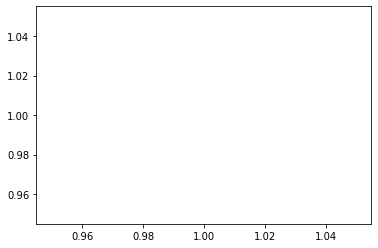

In [1]:
# from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox
# %matplotlib widget
# from IPython.display import display, clear_output

# import ipywidgets as widgets
# import matplotlib.pyplot as plt
# import numpy as np
# import inspect

print('it works')
# plt.figure()
# plt.plot(1,1)
# plt.show()

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from functools import wraps
# import inspect
# from scipy.sparse import dia_matrix

# def initializer(func):
#     """
#     Automatically assigns the parameters.

#     >>> class process:
#     ...     @initializer
#     ...     def __init__(self, cmd, reachable=False, user='root'):
#     ...         pass
#     >>> p = process('halt', True)
#     >>> p.cmd, p.reachable, p.user
#     ('halt', True, 'root')
#     """
#     names, varargs, keywords, defaults = inspect.getargspec(func)

#     @wraps(func)
#     def wrapper(self, *args, **kargs):
#         for name, arg in list(zip(names[1:], args)) + list(kargs.items()):
#             setattr(self, name, arg)

#         for name, default in zip(reversed(names), reversed(defaults)):
#             if not hasattr(self, name):
#                 setattr(self, name, default)

#         func(self, *args, **kargs)

#     return wrapper

# #fixed parameters
# QE = 0.55
# resolution_element=57#microns
# pixel_size = 13#microns
# Gain_ADU = 0.53 #e-/e-
# Throughput = 0.13
# Atmosphere = 0.5
# colors = ['#E24A33','#348ABD','#988ED5','#777777','#FBC15E','#8EBA42','#FFB5B8']
# # CIC_charge = 0.005 # e/pix/frame
# # Dard_current = 0.08 # e/pix/hour
# # Sky_LU = 10000 # 200 000 in 2018
# # 
# # def compoute_photon_loss(RON,GAIN,smearing=0.7,threshold_maximizing_SNR=5.5):
  
# def variable_smearing_kernels(image, Smearing=1.5, SmearExpDecrement=50000):
#     """Creates variable smearing kernels for inversion
#     """
#     import numpy as np
    
#     smearing_length = Smearing * np.exp(-image / SmearExpDecrement)
#     smearing_kernels = np.exp(
#         -np.arange(6)[:, np.newaxis, np.newaxis] / smearing_length
#     )
#     smearing_kernels /= smearing_kernels.sum(axis=0)
#     return smearing_kernels   

# class Observation:
#     @initializer
#     def __init__(self, exposure_time=50, counting_mode=False, Signal=1.25E-17, EM_gain=1400, RN=109, CIC_charge=0.005, Dard_current=0.08, Sky_LU=10000, readout_time=1.5, flight_background_damping = 0.9, Additional_background_2018 = 0.0007,acquisition_time = 2,photon_kept=0.7):
#         self.ENF = 2 if counting_mode else 1
#         if counting_mode:
# #             self.Photon_count_loss = 0.7 if readout_time==1.5 else 0.8 #a contraindre...
#             self.Photon_count_loss = photon_kept
#         else:
#             self.Photon_count_loss =  1
#         self.cosmic_ray_loss = np.minimum(0.005*(exposure_time+readout_time/2),1)
#         self.QE_efficiency = self.Photon_count_loss * QE#* (1-cosmic_ray_loss)#ne devrait pas etre la 
#         self.RN_fraction_kept = 0.05 if counting_mode else 1
#         self.RN_final = RN  * self.RN_fraction_kept / EM_gain #Are we sure about that?
#         self.CIC_noise = np.sqrt(CIC_charge) if counting_mode else np.sqrt(CIC_charge*2)
#         self.Dark_current_f = Dard_current * exposure_time / 3600 # e/pix/frame
#         self.Dark_current_noise =  np.sqrt(self.Dark_current_f) if counting_mode else np.sqrt(self.Dark_current_f*2)
#         self.Additional_background = Additional_background_2018 * exposure_time *(1-flight_background_damping) # e/pix/f
#         self.Additional_background_noise = np.sqrt(self.Additional_background) if counting_mode else np.sqrt(self.Additional_background*2)
#         self.lu2ergs = 2.33E-19/1000
#         self.Sky_ = Sky_LU*self.lu2ergs#/1000*2.33E-19 # ergs/cm2/s/arcsec^2
#         self.factor_el = self.QE_efficiency * Throughput * Atmosphere*(1.1*np.pi/180/3600)**2*np.pi*100**2/4
#         self.sky = Sky_LU*self.factor_el*exposure_time  # el/pix/frame

#         self.Sky_f =  self.sky * EM_gain * Gain_ADU  # el/pix/frame
#         self.Sky_noise = np.sqrt(self.sky) if counting_mode else np.sqrt(self.sky*2)
#         self.N_images = acquisition_time*3600/(exposure_time+readout_time)
#         coeff_stack = 1 #TBC, why was it set to 2
#         self.N_images_true = self.N_images * coeff_stack * (1-self.cosmic_ray_loss)
#         self.Total_sky = self.N_images_true * self.sky
#         self.sky_resolution = self.Total_sky * (resolution_element/pixel_size)**2# el/N exposure/resol
#         self.Signal_LU = Signal / self.lu2ergs# LU(self.Sky_/self.Sky_LU)#ergs/cm2/s/arcsec^2 
#         self.Signal_el = self.Signal_LU*self.factor_el*exposure_time  # el/pix/frame#     Signal * (sky / Sky_)  #el/pix
#         # print(Signal )
#         # print(self.Signal_LU )
#         # print(self.Signal_el )
# #         if counting_mode:
# #             print('%0.1f < ExpTime < %0.1f' %(0.01/self.factor_el/self.Signal_LU,0.1/self.factor_el/self.Signal_LU))
    
#         self.Signal_resolution = self.Signal_el *self.N_images_true* (resolution_element/pixel_size)**2# el/N exposure/resol
#         self.eresolnframe2lu = self.Signal_LU/self.Signal_resolution
#         self.signal_noise = np.sqrt(self.Signal_el) if counting_mode else np.sqrt(self.Signal_el*2)     #el / resol/ N frame
#         self.signal_noise_resol = self.signal_noise *resolution_element/pixel_size   # el/resol/frame
#         self.signal_noise_nframe = self.signal_noise *np.sqrt(self.N_images_true)  # el/resol/frame
#         self.Total_noise_final = np.sqrt(self.signal_noise**2 + self.Dark_current_noise**2  + self.Additional_background_noise**2 + self.Sky_noise**2 + self.CIC_noise**2 + self.RN_final**2   ) #e/  pix/frame
#         self.factor = np.sqrt(self.N_images_true) * (resolution_element/pixel_size)
#         self.Total_noise_nframe = self.Total_noise_final * np.sqrt(self.N_images_true)
#         self.Total_noise_resol = self.Total_noise_nframe * (resolution_element/pixel_size)
#         self.SNR = self.Signal_resolution/self.Total_noise_resol
#         self.Total_noise_final = self.factor*np.sqrt(self.signal_noise**2 + self.Dark_current_noise**2  + self.Additional_background_noise**2 + self.Sky_noise**2 + self.CIC_noise**2 + self.RN_final**2   ) #e/  pix/frame
#         if type(self.Total_noise_final + self.Signal_resolution) == np.float64:#to correct
#             n=0
#         else:
#             n =len(self.Total_noise_final + self.Signal_resolution) 
#         if n>1:
#             for name in ["signal_noise","Dark_current_noise", "Additional_background_noise","Sky_noise", "CIC_noise", "RN_final","Signal_resolution"]:
#                 setattr(self, name, getattr(self,name)*np.ones(n))
#         self.noises = np.array([self.signal_noise*self.factor,  self.Dark_current_noise*self.factor,  self.Additional_background_noise*self.factor, self.Sky_noise*self.factor, self.CIC_noise*self.factor, self.RN_final*self.factor, self.Signal_resolution]).T

#         self.snrs=self.Signal_resolution /self.Total_noise_final
#         self.percents =  100* np.array(self.noises).T[:-1,:]**2/self.Total_noise_final**2
#         # self.percents =  100* np.array(self.noises).T**2/self.Total_noise_final**2



#     def compute_optimal_threshold(self,Smearing=0,title=''):
#         # print(self.Signal_el)#RN=10ADU=45e-
#         flux = self.Signal_el
#         # sys.exit()
#         fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(9,5))
#         flux=0.3
#         size= (int(1e3),int(1e3))#int(1e5)#int(1e3*2e3)
#         im = np.random.poisson(flux, size=size)
#         values,bins = np.histogram(im,bins=[-0.5,0.5,1.5,2.5])
#         ConversionGain=1/4.5#ADU/e-
#         Emgain = self.EM_gain
#         RN=self.RN
#         bins = np.linspace(-100,2000,100)
#         imaADU = (np.random.gamma(im, Emgain) + np.random.normal(0, RN, size=size))*ConversionGain
        
#         if Smearing > 0:
#             # print(SmearExpDecrement)
#             smearing_kernels = variable_smearing_kernels(
#                 imaADU, Smearing, SmearExpDecrement=5e4
#             )
#             offsets = np.arange(6)
#             A = dia_matrix(
#                 (smearing_kernels.reshape((6, -1)), offsets),
#                 shape=(imaADU.size, imaADU.size),
#             )
#             # print(imaADU==A.dot(imaADU.ravel()).reshape(imaADU.shape))
#             imaADU = A.dot(imaADU.ravel()).reshape(imaADU.shape)


#         val0,_,l0 = ax1.hist(imaADU[im==0],bins=bins,alpha=0.5,label='0',log=True)
#         val1,_,l1 = ax1.hist(imaADU[im==1],bins=bins,alpha=0.5,label='1',log=True)
#         val2,_,l2 = ax1.hist(imaADU[im==2],bins=bins,alpha=0.5,label='2',log=True)
#         ax1.hist(imaADU.flatten(),bins=bins,alpha=0.5,label='Total histogram',log=True,histtype='step',lw=2,color='k')


        
#         # val0,_,l0 = ax1.hist(np.random.gamma(0, Emgain,size=int(values[0])) + np.random.normal(0, RN/ConversionGain, size=int(values[0])),bins=bins,alpha=0.5,label='0')
#         # val1,_,l1 =ax1.hist(np.random.gamma(1, Emgain,size=int(values[1])) + np.random.normal(0, RN / ConversionGain, size=int(values[1])),bins=bins,alpha=0.5,label='1')
#         # val2,_,l2  = ax1.hist(np.random.gamma(2, Emgain,size=int(values[2])) + np.random.normal(0, RN / ConversionGain, size=int(values[2])),bins=bins,alpha=0.5,label='2')

#         b = (bins[:-1]+bins[1:])/2
#         rn_noise = RN * np.array([np.sum(val0[b>bi]) for bi in b])/np.sum(val0)
#         # cic_noise =self.CIC_noise[0]
#         signal12 = flux * np.array([np.sum(val1[b>bi])+np.sum(val2[b>bi]) for bi in b])/(np.sum(val1)+np.sum(val2))
#         signal1 = flux * np.array([np.sum(val1[b>bi]) for bi in b])/np.sum(val1)
#         SNR1 = signal1/np.sqrt(signal1+self.CIC_noise[0]+self.Sky_noise[0]+np.array(rn_noise)**2)
#         SNR12 = signal12/ np.sqrt(signal12+self.CIC_noise[0]+self.Sky_noise[0]+np.array(rn_noise)**2)
#         ax2.plot(b,SNR1,label='[N1]/[N0] = %0.2f, frac(N1)=%i%%'%(val1[np.argmax(SNR1)]/val0[np.argmax(SNR1)],100*np.sum(val1[np.argmax(SNR1):])/np.sum(val1)))
#         ax2.plot(b,SNR12,label='[N1+N2]/[N0] = %0.2f, frac(N1+N2)=%i%%'%((val1[np.argmax(SNR12)]+val2[np.argmax(SNR12)])/val0[np.argmax(SNR12)],100*np.sum(val1[np.argmax(SNR12):]+val2[np.argmax(SNR12):])/(np.sum(val1)+np.sum(val2))))
#         L = ax1.legend()
#         ax2.legend()
#         ax2.set_xlabel('ADU')
#         ax1.set_ylabel('#')
#         ax2.set_ylabel('SNR')
#         threshold = b[np.argmax(SNR1)]
#         L.get_texts()[0].set_text('0 e- : %i%%, faction kept: %0.2f%%'%(100*values[0]/(size[0]*size[1]),100*np.sum(val0[np.argmax(SNR1):])/np.sum(val0)))
#         L.get_texts()[1].set_text('1 e- : %i%%, faction kept: %0.2f%%'%(100*values[1]/(size[0]*size[1]),100*np.sum(val1[np.argmax(SNR1):])/np.sum(val1)))
#         L.get_texts()[2].set_text('2 e- : %i%%, faction kept: %0.2f%%'%(100*values[2]/(size[0]*size[1]),100*np.sum(val2[np.argmax(SNR1):])/np.sum(val2)))
#         ax1.plot([threshold,threshold],[0,np.max(val0)],':',c='k')
#         ax2.plot([threshold,threshold],[0,np.max(SNR12)],':',c='k')
#         ax1.set_title(title+'Gain = %i, RN = %i, flux = %0.1f, Smearing=%0.1f, Threshold = %0.2f$\sigma$'%(Emgain,RN,flux,Smearing, threshold/(RN*ConversionGain)))
#         fig.tight_layout()
    
        
#     def PlotNoise(self,title='',x='exposure_time'):
#         # plt.style.use('seaborn')
#         lw=5
#         fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(9, 7), sharex=True)
#         for i,(name,c) in enumerate(zip(["signal_noise","Dark_current_noise", "Additional_background_noise","Sky_noise", "CIC_noise", "RN_final"],colors)):
#             ax1.plot(getattr(self,x), getattr(self,name)*self.factor,label='%s: %i (%0.1f%%)'%(name,(getattr(self,name)*self.factor)[np.argmax(self.snrs)],self.percents[i,np.argmax(self.snrs)]),lw=lw,alpha=0.7,c=c)
#         # ax1.plot(getattr(self,x), getattr(self,"Total_noise_final")*self.factor,label="Total_noise_final", lw=lw,alpha=0.7,c='k')
#         ax1.legend(loc='upper right')
#         # ax3.plot([getattr(self,x)[np.argmax(self.snrs)],getattr(self,x)[np.argmax(self.snrs)]],[0,np.max(self.snrs)],':',c='k')
#         # ax2.plot([getattr(self,x)[np.argmax(self.snrs)],getattr(self,x)[np.argmax(self.snrs)]],[0,100],':',c='k')
#         # ax3.plot(getattr(self,x), self.snrs,lw=0,c='k',label='$SNR_{max}$=%0.1f at t=%i'%(np.max(self.snrs),getattr(self,x)[np.argmax(self.snrs)]))
#         # ax3.legend(loc='upper right')
#         ax1.grid(False)
# #         ax1.set_yscale('log')
#         ax2.grid(False)
#         ax3.grid(False)
#         ax3.stackplot(getattr(self,x), self.snrs * np.array(self.noises).T[:-1,:]**2/self.Total_noise_final**2,alpha=0.7,colors=colors)
#         ax2.stackplot(getattr(self,x),self.percents,alpha=0.7,colors=colors)
#         # stackplot(time,  np.array(self.noises)[:,-1]**2 /np.array(self.noises).T[:1,:]**2)
#         ax2.set_xlim((getattr(self,x).min(),getattr(self,x).max()))
#         ax2.set_ylim((0,100))
#         ax3.set_ylim((0,np.max(self.SNR)))
#         # ax1.set_ylim((time.min(),time.max()))
#         ax3.set_xlabel(x)
#         ax3.set_ylabel('SNR')
#         ax2.set_ylabel('Noise contribution %')
#         ax1.set_ylabel('Noise (e-/res/N frames)')
#         # ax1.set_title('$t_{aqu}$:%0.1fh,G$_{EM}$:%i, Counting:%s - SNR$_{MAX}$=%0.1f'%(new.acquisition_time,new.EM_gain,new.counting_mode,np.max(new.SNR)),y=1)
#         # fig.suptitle('pompo,')
#         # ax1.set_title(title+'Flux:%s, $t_{aqu}$:%0.1fh, G$_{EM}$:%i, Counting:%s'%(self.Signal,self.acquisition_time,self.EM_gain,self.counting_mode))
#         fig.tight_layout()
#         return fig 
    

In [3]:
# class ExposureTimeCalulator(widgets.HBox):
     
#     def __init__(self, exposure_time=50, acquisition_time=2, Sky_LU=4, Signal=5.57e-18, EM_gain=1400,RN=109,CIC_charge=0.005, Dard_current=0.08,readout_time=1.5,x_axis='exposure_time',counting_mode=False,photon_kept=0.7,Additional_background_2018=0):
#         super().__init__()
#         self.output = widgets.Output()
#         self.Additional_background_2018=Additional_background_2018
#         Nominal = Observation(exposure_time=np.linspace(1,150,100),counting_mode=counting_mode, Signal=Signal, EM_gain=EM_gain, RN=RN, CIC_charge=CIC_charge, Dard_current=Dard_current, Sky_LU=10**Sky_LU, readout_time=readout_time, acquisition_time = acquisition_time,photon_kept=photon_kept,Additional_background_2018=self.Additional_background_2018)
#         #flight_background_damping = 0.9, Additional_background_2018 = 0.0007
#         self.x = Nominal.exposure_time#np.linspace(0, 2 * np.pi, 100)
#         self.fig  = Nominal.PlotNoise()
#         args, _, _, locals_ = inspect.getargvalues(inspect.currentframe())
#         self.v=[]
#         for i, ax in enumerate(self.fig.axes):
#             if i==2:
#                 self.v.append(ax.axvline(locals_[x_axis],ls=':',c='k',label='SNR max = %0.1f'%(Nominal.SNR.max())))
#             else:
#                 self.v.append(ax.axvline(locals_[x_axis],ls=':',c='k'))
#         ax.legend(loc='upper right')
#         self.ax0 =  self.fig.axes[0]
#         self.ax1 =  self.fig.axes[1]
#         self.ax2 =  self.fig.axes[2]

#         self.fig.canvas.toolbar_position = 'bottom'
#         style={}#{'description_width': 'initial'}
#         self.exposure_time = widgets.IntSlider( min=1, max=150,value=exposure_time, layout=Layout(width='500px'),description='Texp (s)')#'$t_{exp}$ (s)')
#         self.acquisition_time = widgets.FloatSlider( min=0.1, max=10,value=acquisition_time, layout=Layout(width='500px'),description='Taq (h)')#'$t_{aq}$ (h)')
#         self.Sky_LU = widgets.FloatLogSlider( min=4, max=7,value=Sky_LU,base=10, style =style, layout=Layout(width='500px'),description='Sky (LU)')
# #         self.Signal = widgets. FloatLogSlider( min=-18, max=-15,value=1.25e-17, base=10,step=1e-18, style = style, layout=Layout(width='500px'),description='Flux')
#         self.Signal = widgets.Dropdown(options=[('Bright Galex star (mU~15)', 2.22e-14), ('Extremely Bright QSO (mU~15)', 5.08e-15), ('Bright QSO (mU~19.5)', 3.51e-16),('Bright galaxy (mU~22.5)', 2.22e-17), ('Regular galaxy (mU~24)', 5.57e-18), ('Low SB galaxy (mU~25)', 2.2e-18)],value=Signal,description='Flux')
#         self.EM_gain = widgets.IntSlider( min=200, max=2000,value=EM_gain, style = style, layout=Layout(width='500px'),description='EM gain')
#         self.RN = widgets.IntSlider( min=30, max=120,value=RN, style = style, layout=Layout(width='500px'),description='Read noise')
#         self.CIC_charge = widgets.FloatSlider( min=0.003, max=0.05,value=CIC_charge,style = style, layout=Layout(width='500px'),description='CIC charge',step=0.001,readout_format='.3f')#$_{charge}$
#         self.Dard_current = widgets.FloatSlider( min=0.01, max=0.2,value=Dard_current, style = style, layout=Layout(width='500px'),description='Dard current',step=0.0011,readout_format='.2f')#$_{current}$
#         self.readout_time = widgets.FloatSlider( min=1.5, max=20,value=readout_time, style = style, layout=Layout(width='500px'),description=r'RO time (s)',step=0.1)#$_{time}$
#         self.x_axis=widgets.Dropdown(options=['exposure_time','Sky_LU','acquisition_time',"Signal","EM_gain","RN","CIC_charge","Dard_current" ,"readout_time"],value=x_axis,description='X axis')
# #         self.mode=widgets.Dropdown(options=['Flight 2018','Nominal 2022 10MHz','Nominal 2022 100MHz'],value='Nominal 2022 10MHz',description='X axis')
#         self.counting_mode = widgets.Checkbox(value=counting_mode,description='Thresholding photon counting',disabled=False)#,indent=False)
#         # smearing = widgets.FloatSlider( min=0, max=1.5,value=0.7, layout=Layout(width='500px'),description='CTE not yet',step=0.001)#'$t_{aq}$ (h)') #widgets.Dropdown(options=[0.2,0.7,1.2],value=0.7,description='Smearing (pix)')
#         self.photon_kept = widgets.FloatSlider( min=0.6, max=0.95,value=photon_kept, layout=Layout(width='500px'),description='Photon kept %',step=0.001)#'$t_{aq}$ (h)') #widgets.Dropdown(options=[0.2,0.7,1.2],value=0.7,description='Smearing (pix)')
        
#         self.photon_kept.layout.visibility = 'hidden'

        
#         # wids = widgets.interact(self.update,x_axis=x_axis,counting_mode=False,exposure_time=exposure_time,Sky_LU=Sky_LU,acquisition_time=acquisition_time,Signal=Signal,EM_gain=EM_gain,RN=RN, CIC_charge=CIC_charge, Dard_current=Dard_current, readout_time=readout_time)
#         wids = widgets.interactive(self.update,x_axis=self.x_axis,photon_kept=self.photon_kept,counting_mode=self.counting_mode,exposure_time=self.exposure_time,Sky_LU=self.Sky_LU,acquisition_time=self.acquisition_time,Signal=self.Signal,EM_gain=self.EM_gain,RN=self.RN, CIC_charge=self.CIC_charge, Dard_current=self.Dard_current, readout_time=self.readout_time)
#         controls = VBox([HBox([self.x_axis,self.Signal,self.counting_mode]),   HBox([self.Sky_LU,self.EM_gain,self.photon_kept])     ,  HBox([self.acquisition_time,self.Dard_current,self.CIC_charge]),    HBox([self.exposure_time,self.RN,self.readout_time]) ] )
#         display(HBox([self.output,controls]))
#         #TODO add other plot:
#         # add mode, and make widget left to figure
#         # depends on temperature?
#         # add smearing... FloatRangeSlider
#         # electron spectra

        


#     def update(self, x_axis,counting_mode,Sky_LU,acquisition_time,Signal,EM_gain,RN,CIC_charge,Dard_current,readout_time,exposure_time,photon_kept):
#         """Draw line in plot"""
#         with self.output:
#             args, _, _, locals_ = inspect.getargvalues(inspect.currentframe())
# #             self.fig.suptitle('pompo,')
#             self.ax0.set_title('Gain=%i, Texp=%i, CIC=%0.3f, Dark=%0.3f, RN=%i, Signal=%0.2E, Sky=%0.2E'%(EM_gain,exposure_time,CIC_charge,Dard_current,RN,Signal,Sky_LU),y=0.97)
#             value = locals_[x_axis]
#             if x_axis == 'exposure_time':
#                 exposure_time=np.linspace(1,150,100)
#             if x_axis == 'Sky_LU':
#                 Sky_LU=np.logspace(3,7,100)
                
#             if x_axis == 'exposure_time':
#                 exposure_time=np.linspace(1,150)
#             if x_axis == 'Signal':
#                 Signal=np.logspace(-18,-15)
#             if x_axis == 'EM_gain':
#                 EM_gain=np.linspace(200,2000)
#             if x_axis == 'acquisition_time':
#                 acquisition_time=np.linspace(0.1,6)
#             if x_axis == 'RN':
#                 RN=np.linspace(30,120,100)
#             elif x_axis == 'CIC_charge':
#                 CIC_charge=np.linspace( 0.003, 0.05)
#             if x_axis == 'Dard_current':
#                 Dard_current=np.linspace(0.01,0.2)
#             if x_axis == 'readout_time':
#                 readout_time=np.linspace(0, 50)
#             if (x_axis == 'Sky_LU') | (x_axis == 'Signal'):
#                 self.ax0.set_xscale('log')
# #                 self.ax2.set_yscale('log')
#             else:
#                 self.ax0.set_xscale('linear')
# #                 self.ax2.set_yscale('linear')
#             if counting_mode:
#                 self.photon_kept.layout.visibility = 'visible'
#             else:
#                 self.photon_kept.layout.visibility = 'hidden'

#             new = Observation(exposure_time=exposure_time,Sky_LU=Sky_LU, acquisition_time=acquisition_time,counting_mode=counting_mode,Signal=Signal,EM_gain=EM_gain,RN=RN,CIC_charge=CIC_charge,Dard_current=Dard_current,readout_time=readout_time,photon_kept=photon_kept,Additional_background_2018=self.Additional_background_2018)
#             for v in self.v:
#                 v.set_xdata([value,value])
#             arg = np.argmin(abs(getattr(new,x_axis) - value))
#             self.v[-1].set_label('SNRmax=%0.1f, SNR=%0.1f'%(new.SNR.max(),new.SNR[arg]))
#             max_,min_=[],[]
#             for i,name in enumerate(["signal_noise","Dark_current_noise", "Additional_background_noise","Sky_noise", "CIC_noise", "RN_final"]):
#                 self.fig.axes[0].lines[i].set_xdata(getattr(new,x_axis))
#                 self.fig.axes[0].lines[i].set_ydata(getattr(new,name)*new.factor)
#                 max_.append(np.nanmax(getattr(new,name)*new.factor))
#                 min_.append(np.nanmin(getattr(new,name)*new.factor))
#                 self.fig.axes[0].lines[i].set_label('%s: %i (%0.1f%%)'%(name,(getattr(new,name)*new.factor)[np.argmax(new.snrs)],new.percents[i,np.argmax(new.snrs)]))
#             self.ax0.set_ylim((-0.5,np.max(max_)))
#             self.ax2.legend(loc='upper right')
#             self.fig.axes[0].legend(loc='upper right')
#             self.fig.axes[1].collections.clear()#cla()#
#             self.fig.axes[1].stackplot(getattr(new,x_axis),new.percents,alpha=0.7,colors=colors)
#             self.fig.axes[2].collections.clear()#cla()#
#             self.fig.axes[2].stackplot(getattr(new,x_axis),new.snrs * np.array(new.noises).T[:-1,:]**2/new.Total_noise_final**2,alpha=0.7,colors=colors)
#             # self.fig.axes[0].lines[0].set_ydata(new.SNR)
#             # self.fig.axes[2].lines[0].set_ydata(new.SNR)
#             # self.line.set_xdata(getattr(new,x_axis))
#             # self.line.set_ydata(new.SNR)
#             # self.line.set_data(getattr(new,x_axis),new.SNR)
#             self.ax2.set_xlabel(x_axis)
#             # self.fig.suptitle('$t_{aqu}$:%0.1fh,G$_{EM}$:%i, Counting:%s - SNR$_{MAX}$=%0.1f'%(new.acquisition_time,new.EM_gain,new.counting_mode,np.max(new.SNR)),y=1)
#             # self.fig.axes[0].set_title('$t_{aqu}$:%0.1fh,G$_{EM}$:%i, Counting:%s - SNR$_{MAX}$=%0.1f'%(new.acquisition_time,new.EM_gain,new.counting_mode,np.max(new.SNR)),y=1)
#             # self.ax2.set_ylim((np.min(new.SNR),1.1*np.max(new.SNR)))
#             self.ax2.set_xlim((np.min(getattr(new,x_axis)),np.max(getattr(new,x_axis))))
#             self.ax2.set_ylim((0,np.max(getattr(new,'SNR'))))

# # texp=50, acq_time=2, sky_lu=4, signal=5.57e-18, gain=1400,RN=109,CIC=0.005, dark=0.08,ro_time=1.5,x_axis='exposure_time',counting_mode=False,photon_kept=0.7)
# ETC = ExposureTimeCalulator(EM_gain=1400,RN=109,CIC_charge=0.005, Dard_current=0.08,readout_time=1.5,photon_kept=0.7)



In [4]:
# ETC = ExposureTimeCalulator(EM_gain=1700,RN=50,CIC_charge=0.005, Dard_current=0.18,readout_time=15,photon_kept=0.95)



### Conclusions
- At expected sky levels / exposure / dark etc., the noise contributions are Shot noise (55%), CIC (15%), Sky (10%), RN (6%) and Dark current (3%) 
- Therefore, as dark current is the lower noise, it might be work increasing a bit the temperature decrease smearing
- In nominal condditions SNR=5 is obtained with nominal galaxies (continuum), low SB galaxies drop to SNR=1, bright galaxies to 7, QSO to 35 and bright star to SNR=300
- too cold in 2018 (-90 or less)

### Comparison 2018-2022
- 2018: gain=1400,RN=109,CIC=0.005, dark=0.08,ro_time=1.5,photon_kept=0.7
- 2022: gain=1700,RN=50,CIC=0.005, dark=0.18,ro_time=15,photon_kept=0.95
- Not in PC 2018 was better mostly because of a lower dark and time readout
- In PC: better 2022 because of the higher fraction of counts keps (due to lower smearing and RN)


### Questions?
- I think the smearing is not implemented well as it should decrease the high ADU value much more!!! which we see in the histograms weirdly, why not here?
- Are we sure there is no smearing when no amplification?

### TODO
- add smearing
- Add Threshold x*sigma
- Make vary cosmic ray loss fraction with smearing!



In [5]:
# Nominal = Observation(exposure_time=np.array([5,6]), EM_gain=1400,RN=107).compute_optimal_threshold(title='2018, No smearing')
# Nominal = Observation(exposure_time=np.array([5,6]), EM_gain=1400,RN=107).compute_optimal_threshold(Smearing=0.7,title='2018, smearing')
# Nominal = Observation(exposure_time=np.array([5,6]), EM_gain=1400/3.2,RN=107).compute_optimal_threshold(title='2018, lower gain no smearing')
# #ajouter nombre d'e- recupé pas que %
# #SNR: theoreme d'ergodicite (dans plusieurs endroits)
# #math sto/an
# #ajouter le fond 
# #on prend tous les pix superieur au threshold pas que ceux qui ont recu un e-
# #choisir le gain 


### Conclusions
- Need a quantitative cross check with Bruno's model
- Gain<10*RN decreases the SNR
- Smearing decreases it even more
- Smearing seems to have more impact that just dividind the gain by ~3
- 2022: increased EMgain and decreased RN helps a bit with and without smearing but most important is the fact that new RO frequency could decrease the smearing
- no less than 3-3.5


### Questions/Problems?
- The smearing do not seem to change that much with the addition of smeaering

### TODO
- Comparison with Matematica model




In [6]:
# Nominal = Observation(exposure_time=np.array([5,6]),EM_gain=2000, RN=50).compute_optimal_threshold(Smearing=0,title='2022, No smearing')#1.5)#2022
# Nominal = Observation(exposure_time=np.array([5,6]),EM_gain=2000, RN=50).compute_optimal_threshold(Smearing=0.7,title='2022, smearing')#1.5)#2022

